# Linear models

In [10]:
from typing import List
import numpy as np
%matplotlib widget
from ipywidgets import *
import matplotlib.pyplot as plt

def err_fn(x, y, w):
    n: int = x.shape[0]
    err = (np.sum((y - (w * x)) ** 2)) / (2 * n)
    return err

n: int = 100
x = np.linspace(-1, 1, n)
y = 3 * x + np.random.normal(0, 0.5, size=x.shape) + 3
w_vals = np.linspace(0, 6, 100)

interactive(children=(IntSlider(value=0, description='itr'), Output()), _dom_classes=('widget-interact',))

<function __main__.update(itr=0)>

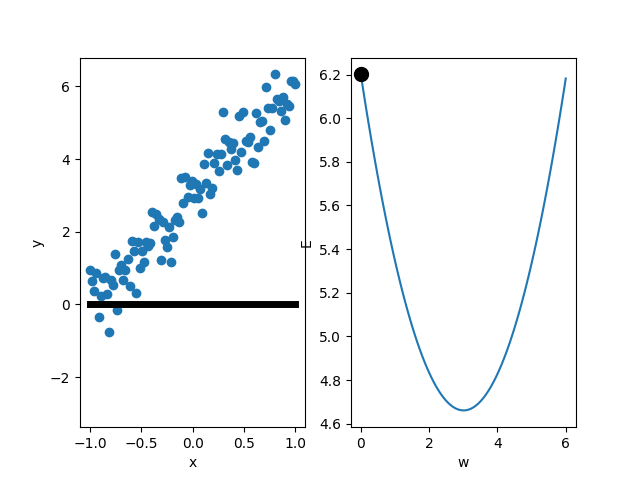

In [15]:
errs: List[int] = []
for w in w_vals:
    err = err_fn(x, y, w)
    errs.append(err)

fig, axs = plt.subplots(1, 2)
for ax in axs:
    ax.set(adjustable='box')
    # ax.set_xticks([])
    # ax.set_yticks([])

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
# axs[1].set_xlim([0, 6])

axs[1].set_xlabel('w')
axs[1].set_ylabel('E')

axs[0].scatter(x, y)
axs[1].plot(w_vals, errs)

w: float = 0.0

w_l: List[float] = [w]
max_itrs: int = 100
for i in range(max_itrs):
    grad = -np.sum((y - (w * x)) * x)/n
    w = w - lr * grad
    w_l.append(w)

lr: float = 0.1

line0, = axs[0].plot(x, w * x, color='k', linewidth=5)
line1, = axs[1].plot(w, err_fn(x, y, w), marker='o', color='k', markersize=10)

def update(itr=0):
    w_itr: float = w_l[itr]
    line0.set_ydata(w_itr * x)
    line1.set_xdata(w_itr)
    line1.set_ydata(err_fn(x, y, w_itr))
    fig.canvas.draw_idle()    
    
interact(update, itr=(0,max_itrs))